In [50]:
import pandas as pd
import numpy as np 
import os

In [52]:
import os
import pandas as pd

def count_images_per_label_df(root_dir):
    records = []
    exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif', '.JPG')
    
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)
        if not os.path.isdir(label_path):
            continue
        
        image_files = [f for f in os.listdir(label_path) if f.lower().endswith(exts)]
        records.append({'Diseases':label, 'Count': len(image_files)})

        
    #df_counts = pd.DataFrame(records)
    #df_counts = df_counts.reset_index(drop=True)
    return records


train_root = "/Users/mertgenc/Desktop/aı_datasets/tomato/train"
val_root = "/Users/mertgenc/Desktop/aı_datasets/tomato/val"

df_train = count_images_per_label_df(train_root)
df_val = count_images_per_label_df(val_root)

print(df_train)
print(df_val)


[{'Diseases': 'Tomato___Target_Spot', 'Count': 1000}, {'Diseases': 'Tomato___Late_blight', 'Count': 1000}, {'Diseases': 'Tomato___Tomato_mosaic_virus', 'Count': 1000}, {'Diseases': 'Tomato___Leaf_Mold', 'Count': 1000}, {'Diseases': 'Tomato___Bacterial_spot', 'Count': 1000}, {'Diseases': 'Tomato___Early_blight', 'Count': 1000}, {'Diseases': 'Tomato___healthy', 'Count': 1000}, {'Diseases': 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Count': 1000}, {'Diseases': 'Tomato___Spider_mites Two-spotted_spider_mite', 'Count': 1000}, {'Diseases': 'Tomato___Septoria_leaf_spot', 'Count': 1000}]
[{'Diseases': 'Tomato___Target_Spot', 'Count': 100}, {'Diseases': 'Tomato___Late_blight', 'Count': 100}, {'Diseases': 'Tomato___Tomato_mosaic_virus', 'Count': 100}, {'Diseases': 'Tomato___Leaf_Mold', 'Count': 100}, {'Diseases': 'Tomato___Bacterial_spot', 'Count': 100}, {'Diseases': 'Tomato___Early_blight', 'Count': 100}, {'Diseases': 'Tomato___healthy', 'Count': 100}, {'Diseases': 'Tomato___Tomato_Yellow_Leaf_

In [55]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_merge= pd.merge(df_train, df_val, on='Diseases', suffixes=('_train', '_val'))

In [58]:
df_merge

,Diseases,Count_train,Count_val
0,Tomato___Target_Spot,1000,100
1,Tomato___Late_blight,1000,100
2,Tomato___Tomato_mosaic_virus,1000,100
3,Tomato___Leaf_Mold,1000,100
4,Tomato___Bacterial_spot,1000,100
5,Tomato___Early_blight,1000,100
6,Tomato___healthy,1000,100
7,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1000,100
8,Tomato___Spider_mites Two-spotted_spider_mite,1000,100
9,Tomato___Septoria_leaf_spot,1000,100


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 30,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    zoom_range= 0.2,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=False ,
    brightness_range= (0.8, 1.2),
    fill_mode ='reflect',   
)

### Gerçekçi verilerle test edilmesi için sadece rescale
val_datagen = ImageDataGenerator(
    rescale=1./255
)


train_gen = train_datagen.flow_from_directory(
    directory=train_root,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    directory=val_root,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)
print(train_gen.class_indices)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()    

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,946 (437.29 KB)

 Trainable params: 111,498 (435.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]


history = model.fit(
    train_gen,
    #steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_data=val_gen,
    #validation_steps=val_gen.samples // val_gen.batch_size,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.4798 - loss: 1.5233

313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 226ms/step - accuracy: 0.4802 - loss: 1.5222 - val_accuracy: 0.1590 - val_loss: 4.9006 - learning_rate: 0.0010
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7238 - loss: 0.7896

313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 235ms/step - accuracy: 0.7238 - loss: 0.7895 - val_accuracy: 0.4370 - val_loss: 2.2988 - learning_rate: 0.0010
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 235ms/step - accuracy: 0.7747 - loss: 0.6372 - val_accuracy: 0.3880 - val_loss: 3.2177 - learning_rate: 0.0010
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8269 - loss: 0.4898

313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 232ms/step - accuracy: 0.8269 - loss: 0.4898 - val_accuracy: 0.6260 - val_loss: 1.2863 - learning_rate: 0.0010
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.8433 - loss: 0.4552

313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 240ms/step - accuracy: 0.8433 - loss: 0.4551 - val_accuracy: 0.6860 - val_loss: 1.1418 - learning_rate: 0.0010
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step - accuracy: 0.8570 - loss: 0.3965 - val_accuracy: 0.5990 - val_loss: 1.7689 - learning_rate: 0.0010
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 239ms/step - accuracy: 0.8777 - loss: 0.3404 - val_accuracy: 0.6610 - val_loss: 1.4653 - learning_rate: 0.0010
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8985 - loss: 0.3072
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.8985 - loss: 0.3072 - val_accuracy: 0.6310 - val_loss: 1.6306 - learning_rate: 0.0010
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.9193 - loss: 0.2489

313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.9193 - loss: 0.2488 - val_accuracy: 0.8290 - val_loss: 0.5726 - learning_rate: 2.0000e-04
Epoch 10/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9292 - loss: 0.2179

313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.9292 - loss: 0.2179 - val_accuracy: 0.8240 - val_loss: 0.5514 - learning_rate: 2.0000e-04
Epoch 11/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9315 - loss: 0.2028

313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - accuracy: 0.9315 - loss: 0.2029 - val_accuracy: 0.8460 - val_loss: 0.5141 - learning_rate: 2.0000e-04
Epoch 12/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 256ms/step - accuracy: 0.9360 - loss: 0.1951 - val_accuracy: 0.8400 - val_loss: 0.5292 - learning_rate: 2.0000e-04
Epoch 13/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.9360 - loss: 0.1917 - val_accuracy: 0.8290 - val_loss: 0.6587 - learning_rate: 2.0000e-04
Epoch 14/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9400 - loss: 0.1842
Epoch 14: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 280ms/step - accuracy: 0.9400 - loss: 0.1842 - val_accuracy: 0.7680 - val_loss: 0.8475 - learning_rate: 2.0000e-04
Epoch 15/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.9398 - loss: 0.1842

313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.9398 - loss: 0.1842 - val_accuracy: 0.8650 - val_loss: 0.4409 - learning_rate: 4.0000e-05
Epoch 16/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 272ms/step - accuracy: 0.9432 - loss: 0.1701 - val_accuracy: 0.8370 - val_loss: 0.5665 - learning_rate: 4.0000e-05
Epoch 17/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 288ms/step - accuracy: 0.9448 - loss: 0.1582 - val_accuracy: 0.8120 - val_loss: 0.6845 - learning_rate: 4.0000e-05
Epoch 18/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9401 - loss: 0.1746
Epoch 18: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 289ms/step - accuracy: 0.9401 - loss: 0.1746 - val_accuracy: 0.8410 - val_loss: 0.5556 - learning_rate: 4.0000e-05
Epoch 19/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 281ms/step - accuracy: 0.9438 - loss: 0.1693 - val_accuracy: 0.8390 - val_loss: 0.5710 - learning_rate: 8.0000e-06
Epoch 20/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - 

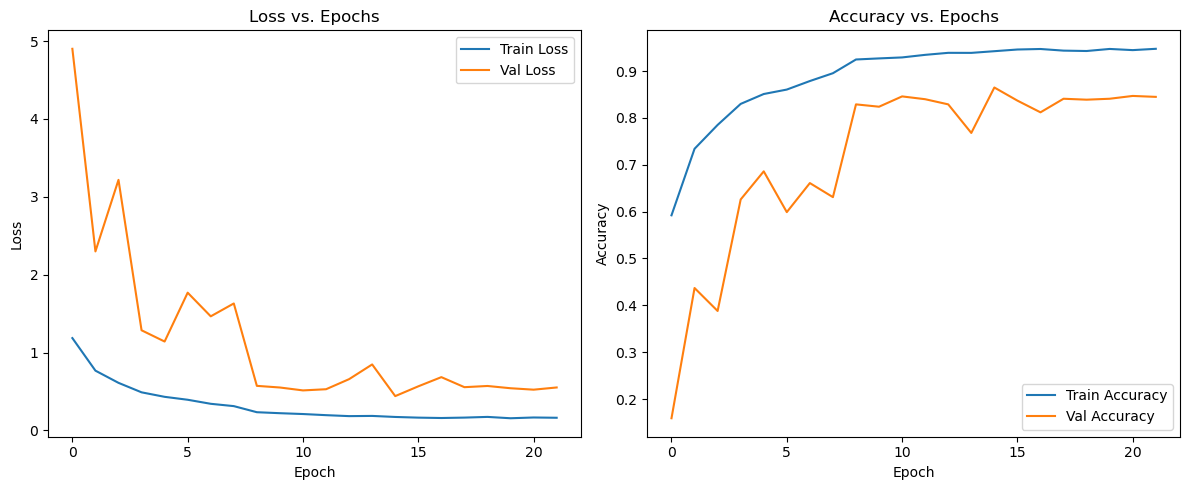

In [34]:
import matplotlib.pyplot as plt

# Loss değerlerini çiz
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy değerlerini çiz
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


load = load_model('best_model.h5')

In [51]:
loss, accuracy = load.evaluate(val_gen)
print(f"Test Loss: {loss:.4f}")
print(f"Test Doğruluk (Accuracy): {accuracy:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9003 - loss: 0.3224
Test Loss: 0.4409
Test Doğruluk (Accuracy): 0.8650


In [72]:

img = image.load_img('domates_yap.jpg', target_size=(128, 128))  

img_array = image.img_to_array(img)


img_array = img_array / 255.0

input_data = np.expand_dims(img_array, axis=0)


In [74]:

prediction = load.predict(img)
print("Model çıktısı:", prediction)

# Sınıf tahmini
predicted_class = np.argmax(prediction, axis=1)
print("Tahmin edilen sınıf:", predicted_class)

ValueError: Unrecognized data type: x=<PIL.Image.Image image mode=RGB size=128x128 at 0x1622BE780> (of type <class 'PIL.Image.Image'>)